In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import glob
import import_ipynb as ipynb
import n_most_similar_games as matchup
from bs4 import BeautifulSoup
from collections import Counter

CAL_OFF = 90
OPP_DEF = 70
#NOTE: EPV CAPS ROUGHLY AT 5 BC EXTRA POINT IS NOT ACCOUNTED FOR?? BRING UP AT MEETING


In [2]:
temp = []
data = []
subpxp = []
for year in range(2008,2018):    
    path ='NCAA-Football-Data/' + str(year) + 'PXP' # use your path
    allFiles = glob.glob(path + "/*.csv")
    frame = pd.DataFrame()
    list_ = []
    cols = ['gameId', 'driveIndex', 'year', 'week', 'clock', 'quarter', 'down', 'yardLine', 'distance', 'yardsGained',
            'offenseTeam', 'defenseTeam', 'description', 'type',
            'homeScore', 'awayScore', 'homeTeam', 'awayTeam']
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=0, usecols=cols)
        list_.append(df)
        subpxp = pd.concat(list_, ignore_index=True)
    temp.append(subpxp)
    data= pd.concat(temp, ignore_index=True)

In [3]:
import cal_football as cf


In [4]:
pxp = cf.extract_data(data)
badyard = ~((pxp['yrdline100']>=100)|(pxp['yrdline100']<=0))
# possession_values = cf.get_possession_value(ko_and_pos)

In [46]:
path = 'Test_File.csv'
cols = ['gameId', 'driveIndex', 'year', 'week', 'clock', 'quarter', 'down', 'yardLine', 'distance', 'yardsGained',
            'offenseTeam', 'defenseTeam', 'description', 'type',
            'homeScore', 'awayScore', 'homeTeam', 'awayTeam']
df = pd.read_csv(file_,index_col=None, header=0, usecols=cols)
pxp = cf.extract_data(df)
badyard = ~((pxp['yrdline100']>=100)|(pxp['yrdline100']<=0))

ko_and_poss = cf.extract_kickoffs_and_possessions(pxp)
fgs = cf.extract_field_goals(pxp)
third_downs = cf.extract_third_downs(pxp)
punts = cf.extract_punts(pxp)

ekv,epv_model = cf.epv_model(ko_and_poss)
exp_conv_pct_model = cf.exp_conv_pct_model(third_downs)
exp_net_punt_dist_model = cf.exp_net_punt_dist_model(punts)
exp_fg_prob_model = cf.exp_fg_prob_model(fgs)
epv_model

yrdline100
0      5.902117
3      5.712634
4      5.649473
6      5.523151
7      5.459990
8      5.396829
10     5.270507
11     5.207346
13     5.081024
14     5.017863
15     4.954702
16     4.891541
18     4.765220
19     4.702059
21     4.575737
23     4.449415
24     4.386254
25     4.323093
28     4.133610
29     4.070449
30     4.007288
32     3.880966
35     3.691483
36     3.628322
37     3.565161
38     3.502000
39     3.438839
40     3.375678
41     3.312517
42     3.249356
         ...   
71     1.417688
72     1.354527
73     1.291366
74     1.228205
75     1.165044
76     1.101883
77     1.038722
78     0.975561
79     0.912401
80     0.849240
81     0.786079
82     0.722918
83     0.659757
84     0.596596
85     0.533435
86     0.470274
87     0.407113
88     0.343952
89     0.280791
90     0.217630
91     0.154469
92     0.091308
93     0.028147
94    -0.035014
95    -0.098175
96    -0.161336
97    -0.224497
98    -0.287658
99    -0.350819
100   -0.413980
Name: EPV, Le

KeyError: 'home_off_away_def'

In [7]:
game_data, rating_data, pxp_data = matchup.get_ratings()
games_compared, matchup_pxp = matchup.most_similar(off_rating = CAL_OFF, def_rating = OPP_DEF, n = 200, game_data = game_data, rating_data = rating_data, pxp_data=pxp_data)

#matchup_pxp = cf.extract_data(matchup_pxp)
#matchup_pxp

/Users/jeremylevitt/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/jeremylevitt/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [8]:
def m_extract_data(pxp):

# We only cover offensive TouchDown

    cols = ['gameId', 'driveIndex', 'quarter', 'down', 'yardLine', 'distance', 'yardsGained',
            'offenseTeam', 'defenseTeam', 'description', 'type', 'isScoringPlay',
            'homeScore', 'awayScore', 'homeTeam', 'awayTeam', 'clock']

    pxp['type'].fillna('No Play', inplace = True)

    # Compute half.  For OT (qtr = 5 or 6), use half = 3. 
    pxp['half'] = pd.cut(pxp['quarter'], [1,2,4,6], labels=[1,2,3], include_lowest=True)

    # Compute yardage (NCAA data yardage is relative to home team except for kickoff plays) 
#     pxp['yrdline100'] = np.select([(pxp['homeTeam'] == pxp['offenseTeam']) & (~pxp['type'].str.contains('Kickoff')), 
#                                 (pxp['homeTeam'] == pxp['offenseTeam']) & (pxp['type'].str.contains('Kickoff')), 
#                                 (pxp['awayTeam'] == pxp['offenseTeam']) & (~pxp['type'].str.contains('Kickoff')),
#                                 (pxp['awayTeam'] == pxp['offenseTeam']) & (pxp['type'].str.contains('Kickoff'))], 
#                                [100-pxp['yardLine'], pxp['yardLine'], pxp['yardLine'], 100-pxp['yardLine']], default='np.nan').astype(int)
    yrdline100arr = []
            
    for index, row in pxp.iterrows():
        if row['home_off_away_def']:
            yrdline100arr.append(row['yardLine'])
        else:
            yrdline100arr.append(100 - row['yardLine'])
    pxp['yrdline100'] = yrdline100arr

    # Compute field region
    pxp['yrdregion'] = pd.cut(pxp['yrdline100'], [0., 9., 20., 100.], labels=['Inside10', '10to20', 'Beyond20'])
    
    # Compute Touchdown play: Make a new column to determine offensive touchdown (only either rushing or passing play)
    # The NFL model use both defensive and offensive TD here (and some other weird type of TD)
    pxp['Touchdown'] = np.where((pxp['type']=='Passing Touchdown')|(pxp['type']=='Rushing Touchdown')|(pxp['description'].str.contains('TD'))|(pxp['description'].str.contains('Touchdown'))|(pxp['description'].str.contains('TOUCHDOWN')), 1, 0)

    # index of play
    pxp['index'] = range(1, len(pxp) + 1)

    ## Compute fieldgoal play: Make a new column to determine fieldgoals as missed, blocked, or good
   
    ## Compute fieldgoal distance: Make a new column to determine fieldgoals distance (blockFG for TD and return is different)


    # Fill in missing values due to timeouts leaving NAs in the dataset. This is not needed in NCAA plays
#     pxp.loc[:, ['HomeScore', 'AwayScore']] = pxp[['HomeScore', 'AwayScore']].fillna(method='ffill')
    
    # Compute nextposteam, nextyrdline100, nextdown, and 1stdownconversion.  Must be within a game 
    # and a half since possession doesn't carry between halves and obviously not between games.  
    # Non-relevant plays are ignored so that computations aren't mangled.

#     There is no extra point plays
    ignore_plays = ['Penalty', 'End Period', 'Timeout', 'End of Half', 'End of Game', 
        'No Play', 'Coin Toss', 'Extra Point Good','Blocked PAT','Extra Point Missed']
    
    ignore_mask = ~pxp['type'].isin(ignore_plays)
    game_halves = pxp.\
        loc[ignore_mask].\
        groupby(['gameId', 'half'])
    pxp.loc[ignore_mask, 'nextposteam'] = game_halves['offenseTeam'].\
        shift(-1).\
        fillna(method='bfill')
    pxp.loc[ignore_mask, 'nextyrdline100'] = game_halves['yrdline100'].\
        shift(-1).\
        fillna(method='bfill')
    pxp.loc[ignore_mask, 'nextdown'] = game_halves['down'].\
        shift(-1).\
        fillna(method='bfill')
    pxp.loc[ignore_mask, '1stdownconversion'] = (
        (pxp.loc[ignore_mask, 'nextdown'] == 1.) | 
        (pxp.loc[ignore_mask, 'distance'] <= pxp.loc[ignore_mask, 'yardsGained']) |
        (pxp.loc[ignore_mask, 'Touchdown'] == 1)
    ).astype(int)
    
    return pxp

In [9]:
matchup_pxp = m_extract_data(matchup_pxp)

In [10]:
def modified_extract_k_and_p(pxp):
    
    
    ko_mask = pxp['type'].isin(['Kickoff', 'Kickoff Return (Defense)','Kickoff Return Touchdown','Kickoff Return (Offense)'])  
    kickoffs = pxp.loc[ko_mask]
    # Exclude kickoffs and XPs and groupby GameID and Drive
    xp_mask = pxp['type'].isin(['Extra Point Good','Blocked PAT','Extra Point Missed','No Play'])
    game_drives = pxp.loc[~ko_mask & ~xp_mask].groupby(['gameId', 'driveIndex'])

    poss_starts = game_drives.head(1)
    
    

    # Concatenate kickoffs and first plays, sort, and reindex
    ko_and_poss = pd.concat([kickoffs, poss_starts])\
            .sort_values(['gameId', 'driveIndex', 'index'], na_position='first')
    ko_and_poss.reset_index(drop=True, inplace=True)
    # Extract game halves
    game_halves = ko_and_poss.groupby(['gameId', 'half'])
    
    
    #Original Score_change explanaition:
    # Compute changes in the scores.  + for Home and - for Away. Aka if the away team score then -7
    
    #Modified: Negative score change if team analogous to Cal's opponent scores. Postitive if team analagous to Cal scores
    #See n_most_similar most_similar() function for explaination as to what matchup_list[3] is.
    print(str(len(game_halves)))
    # Backfill the score change so that each 
    score_change_arr = []
    print("length of pxp: " + str(len(pxp)))
    score_change = game_halves['homeScore'].diff() - game_halves['awayScore'].diff()
    ko_and_poss['unfinalized_sc'] = score_change
    for index, row in ko_and_poss.iterrows():
        if row['home_off_away_def']:
            score_change_arr.append(row['unfinalized_sc'])
        else:
            score_change_arr.append(-row['unfinalized_sc'])
    ko_and_poss['score_change'] = score_change_arr
    print("Length of KO: " + str(len(ko_and_poss)))
    print("\nLength of Score_Change_arr: " + str(len(score_change_arr)))
    ko_and_poss['score_change'] = score_change_arr
    ko_and_poss['NextScore'] = score_change.fillna(0).replace(to_replace=0., method='bfill')
#     ko_and_poss.loc[ko_and_poss['Touchdown']==1, 'NextScore'] = ko_and_poss['NextScore']/ko_and_poss['NextScore']*7
    
    #originial algorithm:
    # Determine if the possessing team is home or away
    # NextScore is unchanged if posteam == hometeam and negated if posteam == awayteam
    
    #Matchup Modified Algorithm:
    #Determine if the posessing team is analagous to Cal or analgous to opponent team
    #NextScore is unchanged if posteam == ANALAGOUSCAL and negated if posteam == ANALGOUSOPP
    
    posteam_is_CAL_arr = []
    posteam_is_OPP_arr = []
    for index, row in ko_and_poss.iterrows():
        if row["home_off_away_def"]:
            posteam_is_CAL_arr.append(int(row['offenseTeam'] == row['homeTeam']))
            posteam_is_OPP_arr.append(int(row['offenseTeam'] == row['awayTeam']))
        else:
            posteam_is_CAL_arr.append(int(row['offenseTeam'] == row['awayTeam']))
            posteam_is_OPP_arr.append(int(row['offenseTeam'] == row['homeTeam']))
     
    ko_and_poss['posteam_is_CAL'] = posteam_is_CAL_arr
    ko_and_poss['posteam_is_OPP'] = posteam_is_OPP_arr
    ko_and_poss['PossessionValue'] = ko_and_poss['NextScore'] * \
        (ko_and_poss['posteam_is_CAL'] - ko_and_poss['posteam_is_OPP'])

    return ko_and_poss

In [22]:
path = 'Test_File.csv'
cols = ['gameId', 'driveIndex', 'year', 'week', 'clock', 'quarter', 'down', 'yardLine', 'distance', 'yardsGained',
            'offenseTeam', 'defenseTeam', 'description', 'type',
            'homeScore', 'awayScore', 'homeTeam', 'awayTeam']
df = pd.read_csv(file_,index_col=None, header=0, usecols=cols)
df["home_off_away_def"] = np.repeat(True, len(df))
pxp = m_extract_data(df)

badyard = ~((pxp['yrdline100']>=100)|(pxp['yrdline100']<=0))

m_ko_and_poss = modified_extract_k_and_p(matchup_pxp)
m_third_downs = cf.extract_third_downs(matchup_pxp)

m_ekv, m_epv_model = cf.epv_model(m_ko_and_poss)
m_exp_conv_pct_model = cf.exp_conv_pct_model(m_third_downs)
m_epv_model

415
length of pxp: 37395
Length of KO: 7256

Length of Score_Change_arr: 7256


yrdline100
1     1.034208
2     1.015097
3     0.995986
4     0.976875
5     0.957764
6     0.938653
7     0.919542
8     0.900431
9     0.881320
10    0.862209
11    0.843098
12    0.823987
13    0.804876
14    0.785765
15    0.766654
16    0.747543
17    0.728433
18    0.709322
19    0.690211
20    0.671100
21    0.651989
22    0.632878
23    0.613767
24    0.594656
25    0.575545
26    0.556434
27    0.537323
28    0.518212
29    0.499101
30    0.479990
        ...   
70   -0.284447
71   -0.303558
72   -0.322669
73   -0.341780
74   -0.360891
75   -0.380002
76   -0.399113
77   -0.418224
78   -0.437335
79   -0.456445
80   -0.475556
81   -0.494667
82   -0.513778
83   -0.532889
84   -0.552000
85   -0.571111
86   -0.590222
87   -0.609333
88   -0.628444
89   -0.647555
90   -0.666666
91   -0.685777
92   -0.704888
93   -0.723999
94   -0.743109
95   -0.762220
96   -0.781331
97   -0.800442
98   -0.819553
99   -0.838664
Name: EPV, Length: 99, dtype: float64

In [11]:
ko_and_poss = cf.extract_kickoffs_and_possessions(pxp)

In [12]:
fgs = cf.extract_field_goals(pxp)
third_downs = cf.extract_third_downs(pxp)
punts = cf.extract_punts(pxp)

ekv,epv_model = cf.epv_model(ko_and_poss)
exp_conv_pct_model = cf.exp_conv_pct_model(third_downs)
exp_net_punt_dist_model = cf.exp_net_punt_dist_model(punts)
exp_fg_prob_model = cf.exp_fg_prob_model(fgs)

In [14]:
m_ko_and_poss = modified_extract_k_and_p(matchup_pxp)
m_third_downs = cf.extract_third_downs(matchup_pxp)
m_ko_and_poss

415
length of pxp: 37395
Length of KO: 7256

Length of Score_Change_arr: 7256


,awayAbbr,awayId,awayScore,awayTeam,clock,defenseAbbr,defenseId,defenseTeam,description,distance,down,driveIndex,endYardLine,gameId,homeAbbr,homeId,homeScore,homeTeam,isScoringPlay,offenseAbbr,offenseId,offenseTeam,playIndex,quarter,type,wallclock,week,yardLine,yardsGained,year,home_off_away_def,half,yrdline100,yrdregion,Touchdown,index,nextposteam,nextyrdline100,nextdown,1stdownconversion,unfinalized_sc,score_change,NextScore,posteam_is_CAL,posteam_is_OPP,PossessionValue
0,ND,87,0,Notre Dame,14:24,MICH,130,Michigan,Brady Quinn pass complete to Maurice Stovall f...,10,1,0,70,252530130,MICH,130,0,Michigan,NaN,ND,87,Notre Dame,0,1,Pass,NaN,2,76,6,2005,False,1,24,Beyond20,0,30863,Notre Dame,30.0,2.0,0.0,NaN,NaN,-7,1,0,-7
1,ND,87,7,Notre Dame,11:56,MICH,130,Michigan,Carl Gioia kickoff for 65 yards returned by Gr...,-1,-1,0,19,252530130,MICH,130,0,Michigan,NaN,ND,87,Notre Dame,13,1,Kickoff,NaN,2,65,19,2005,False,1,35,Beyond20,0,30876,Michigan,81.0,1.0,1.0,-7,7.0,-7,1,0,-7
2,ND,87,7,Notre Dame,11:46,ND,87,Notre Dame,Mike Hart rush for 2 yards to the Mich 21.,10,1,1,21,252530130,MICH,130,0,Michigan,NaN,MICH,130,Michigan,0,1,Rush,NaN,2,19,2,2005,False,1,81,Beyond20,0,30877,Michigan,79.0,2.0,0.0,0,0.0,3,0,1,-3
3,ND,87,7,Notre Dame,8:49,MICH,130,Michigan,Brady Quinn pass complete to Darius Walker for...,10,1,2,74,252530130,MICH,130,0,Michigan,NaN,ND,87,Notre Dame,0,1,Pass,NaN,2,79,5,2005,False,1,21,Beyond20,0,30884,Notre Dame,26.0,2.0,0.0,0,0.0,3,1,0,3
4,ND,87,7,Notre Dame,6:48,ND,87,Notre Dame,Chad Henne pass complete to Steve Breaston for...,10,1,3,42,252530130,MICH,130,0,Michigan,NaN,MICH,130,Michigan,0,1,Pass,NaN,2,34,8,2005,False,1,66,Beyond20,0,30890,Michigan,68.0,2.0,0.0,0,0.0,3,0,1,-3
5,ND,87,7,Notre Dame,5:20,MICH,130,Michigan,Asaph Schwapp rush for 4 yards to the NDame 27.,10,1,4,73,252530130,MICH,130,0,Michigan,NaN,ND,87,Notre Dame,0,1,Rush,NaN,2,77,4,2005,False,1,23,Beyond20,0,30895,Notre Dame,27.0,2.0,0.0,0,0.0,3,1,0,3
6,ND,87,7,Notre Dame,3:41,ND,87,Notre Dame,Chad Henne pass incomplete to Mike Hart.,10,1,5,30,252530130,MICH,130,0,Michigan,NaN,MICH,130,Michigan,0,1,Pass,NaN,2,30,0,2005,False,1,70,Beyond20,0,30902,Michigan,70.0,2.0,0.0,0,0.0,3,0,1,-3
7,ND,87,7,Notre Dame,1:20,MICH,130,Michigan,Brady Quinn pass incomplete to Maurice Stovall.,10,1,6,80,252530130,MICH,130,0,Michigan,NaN,ND,87,Notre Dame,0,1,Pass,NaN,2,80,0,2005,False,1,20,10to20,0,30908,Notre Dame,20.0,2.0,0.0,0,0.0,3,1,0,3
8,ND,87,7,Notre Dame,0:10,ND,87,Notre Dame,Steve Breaston rush for 30 yards to the NDame ...,10,1,7,74,252530130,MICH,130,0,Michigan,NaN,MICH,130,Michigan,0,1,Rush,NaN,2,44,30,2005,False,1,56,Beyond20,0,30912,Michigan,26.0,1.0,1.0,0,0.0,3,0,1,-3
9,ND,87,7,Notre Dame,14:04,ND,87,Notre Dame,Kevin Grady kickoff for 65 yards for a touchback.,-1,-1,7,80,252530130,MICH,130,3,Michigan,NaN,MICH,130,Michigan,5,2,Kickoff,NaN,2,35,0,2005,False,1,65,Beyond20,0,30917,Notre Dame,20.0,1.0,1.0,3,-3.0,3,0,1,-3


In [15]:
m_ekv, m_epv_model = cf.epv_model(m_ko_and_poss)
m_exp_conv_pct_model = cf.exp_conv_pct_model(m_third_downs)


In [16]:
m_epv_model


yrdline100
1     1.034208
2     1.015097
3     0.995986
4     0.976875
5     0.957764
6     0.938653
7     0.919542
8     0.900431
9     0.881320
10    0.862209
11    0.843098
12    0.823987
13    0.804876
14    0.785765
15    0.766654
16    0.747543
17    0.728433
18    0.709322
19    0.690211
20    0.671100
21    0.651989
22    0.632878
23    0.613767
24    0.594656
25    0.575545
26    0.556434
27    0.537323
28    0.518212
29    0.499101
30    0.479990
        ...   
70   -0.284447
71   -0.303558
72   -0.322669
73   -0.341780
74   -0.360891
75   -0.380002
76   -0.399113
77   -0.418224
78   -0.437335
79   -0.456445
80   -0.475556
81   -0.494667
82   -0.513778
83   -0.532889
84   -0.552000
85   -0.571111
86   -0.590222
87   -0.609333
88   -0.628444
89   -0.647555
90   -0.666666
91   -0.685777
92   -0.704888
93   -0.723999
94   -0.743109
95   -0.762220
96   -0.781331
97   -0.800442
98   -0.819553
99   -0.838664
Name: EPV, Length: 99, dtype: float64

In [55]:
epv_model

yrdline100
0      5.054143
1      4.999428
2      4.944714
3      4.889999
4      4.835284
5      4.780569
6      4.725854
7      4.671140
8      4.616425
9      4.561710
10     4.506995
11     4.452280
12     4.397566
13     4.342851
14     4.288136
15     4.233421
16     4.178706
17     4.123992
18     4.069277
19     4.014562
20     3.959847
21     3.905132
22     3.850418
23     3.795703
24     3.740988
25     3.686273
26     3.631558
27     3.576844
28     3.522129
29     3.467414
         ...   
73     1.059963
74     1.005248
75     0.950533
76     0.895818
77     0.841103
78     0.786389
79     0.731674
80     0.676959
81     0.622244
82     0.567529
83     0.512815
84     0.458100
85     0.403385
86     0.348670
87     0.293955
88     0.239241
89     0.184526
90     0.129811
91     0.075096
92     0.020381
93    -0.034333
94    -0.089048
95    -0.143763
96    -0.198478
97    -0.253193
98    -0.307907
99    -0.362622
100   -0.417337
159   -3.645510
162   -3.809655
Name: EPV, Le

In [17]:
epv_model.to_pickle("./epv_model.pkl")
exp_conv_pct_model.to_pickle("./exp_conv_pct_model.pkl")
exp_net_punt_dist_model.to_pickle("./exp_net_punt_dist_model.pkl")
exp_fg_prob_model.to_pickle("./exp_fg_prob_model.pkl")


In [18]:
m_epv_model.to_pickle("./m_epv_model.pkl")
m_exp_conv_pct_model.to_pickle("./m_exp_conv_pct_model.pkl")

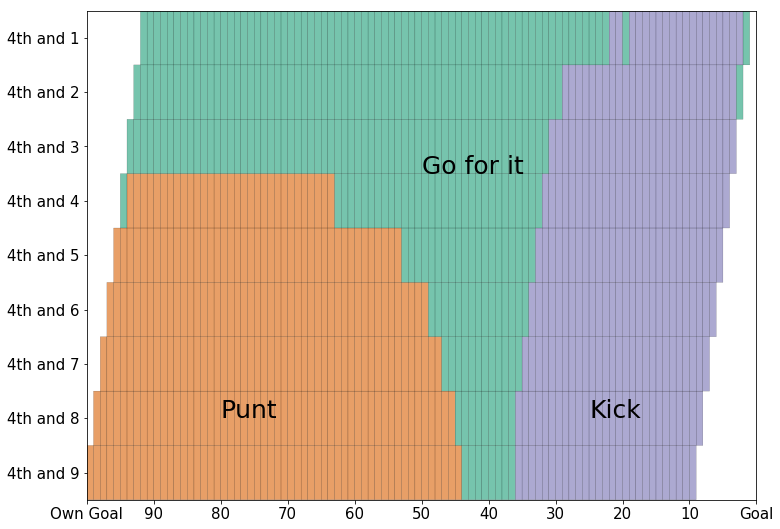

In [19]:
def build_decision_maker(yrdline100, ydstogo, ekv, epv_model, exp_conv_pct_model, 
                         exp_net_punt_dist_model, exp_fg_prob_model,
                        m_ekv, m_epv_model_use, m_exp_conv_pct_model, w):
    
    YRDSTOGO_CAP = 10  # Model restriction
    PUNT_LIM = 29      # Model restriction
    FG_LIM = 63        # Model restriction
    FG_OFFSET = 8      # Field goal placement distance (not including the 10 for the endzone)
    FG_FAIL_RESET = 0  # Where the ball is placed after a failed field goal.  If 0, at the spot.  
                       # Otherwise, at the spot or at the reset spot, whichever is better.
    if yrdline100 < 10:
        region = 'Inside10'
    elif yrdline100 < 20:
        region = '10to20'
    else:
        region = 'Beyond20'
            
        # 1. Expected value of going for it
        
        # Value of failing (approximately turning over at same spot)
    conv_fail_yrdline100 = 100 - yrdline100
    conv_fail_epv = -epv_model[conv_fail_yrdline100] 
        
    m_conv_fail_epv = -m_epv_model[conv_fail_yrdline100]
        
        # Value of converting (approximately at the first down marker)
    if yrdline100 == ydstogo:
        conv_succ_epv = 6 - ekv
        m_conv_succ_epv = 6 - m_ekv
    else:
        first_down_yrdline100 = yrdline100 - ydstogo
        conv_succ_epv = epv_model[first_down_yrdline100] -1
        m_conv_succ_epv = m_epv_model[first_down_yrdline100] - 1

        # Conversion Pct
    exp_conv_pct = exp_conv_pct_model[(region, ydstogo)] if ydstogo < YRDSTOGO_CAP else None
    m_exp_conv_pct = m_exp_conv_pct_model[(region, ydstogo)] if ydstogo < YRDSTOGO_CAP else None
        
        # Overall expected value of going for it
    unmod_go_ev = exp_conv_pct * conv_succ_epv + (1 - exp_conv_pct) * conv_fail_epv
    m_go_ev = m_exp_conv_pct * m_conv_succ_epv + (1 - m_exp_conv_pct) * m_conv_fail_epv
    go_ev = w * m_go_ev + (1 - w) * unmod_go_ev
        ####THIS IS WHERE YOU ADD THE MATCHUP EPV WEIGHT AND STUFF (ABOVE)
        
        
        
        
        # 2. Expected value of punting
        
        # Expected next yardline
    if yrdline100 >= PUNT_LIM:
        exp_net_punt_dist = exp_net_punt_dist_model[yrdline100]
        exp_yrdline100 = 100 - yrdline100 + int(exp_net_punt_dist)
            
            # Overall expected value of punting
        punt_ev = -epv_model[exp_yrdline100]
    else:
        punt_ev = None
            
        # 3. Expected value of kicking a field goal
    fg_dist =  yrdline100 + 10 + FG_OFFSET
    if fg_dist <= FG_LIM:
        # Probability of success
        exp_fg_prob = exp_fg_prob_model[fg_dist ]

        # Expected value of field success
        fg_succ_epv = 3 - ekv

        # EPV of field goal fail
        fg_fail_yrdline100 = 100 - yrdline100 - FG_OFFSET
        fg_fail_epv = -epv_model[fg_fail_yrdline100]

        # Overall expected value kicking
        fg_ev = fg_succ_epv * exp_fg_prob + fg_fail_epv * (1 - exp_fg_prob)
    else:
        fg_ev = None
    
    choices = [('go for it', go_ev), ('punt', punt_ev), ('kick', fg_ev)]
    max_val = -100
    for choice, ev in choices:
        if ev is None:
            continue
        if ev > max_val:
            max_val = ev
            decision = choice
    
    print_message=False
    if print_message:
        print("Expected Values")
        print("Go for it: {:.2f}".format(go_ev))
        if punt_ev is not None:
            print("Punt: {:.2f}".format(punt_ev))
        else:
            print("Punt: TOO CLOSE TO PUNT")
        if fg_ev is not None:
            print("FG: {:.2f}".format(fg_ev))
        else:
            print("FG: TOO FAR TO KICK")        

        print()
        print("Coach, you should:")
        print(decision.upper())
    
    return decision

# Build the decision maker

yrdlines = list(range(1, 100))
down_dist = list(range(1, 10))

decisions = []
for yrdstogo in down_dist:
    tmp = []
    for yrdline in yrdlines:
        if (yrdline >= yrdstogo) and (100 - yrdline + yrdstogo >= 10): # Exclude impossible scenarios
            decision = build_decision_maker(yrdline, yrdstogo, 
                                            ekv, epv_model, exp_conv_pct_model, exp_net_punt_dist_model, 
                                            exp_fg_prob_model, m_ekv, m_epv_model, m_exp_conv_pct_model, 0.05)
            tmp.append(decision)
        else:
            tmp.append(None)
    decisions.append(tmp)
# Convert to a table
pd.DataFrame(decisions, columns=yrdlines, index=down_dist)

import numpy as np
data = np.zeros((9, 99))
for i in range(9):
    for j in range(99):
        decision = decisions[i][j]
        if decision == 'go for it':
            val = 1
        elif decision == 'punt':
            val = 2
        elif decision == 'kick':
            val = 3
        elif decision is None:
            val = np.nan
        data[i, j] = val
data = data[::-1,::-1]

fig, ax = plt.subplots(figsize=(12, 9))

ax.pcolor(
    data,
    vmin=1,
    vmax=8,
    edgecolors='k', 
    linewidths=.2,
    cmap=plt.get_cmap('Dark2'),
    alpha=.6
);
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xticklabels(['Own Goal', '90', '80', '70', '60', '50', '40', '30', '20', '10', 'Goal'])
ax.set_yticks([
    yd - .5
    for yd in range(1, 10)
])
ax.set_yticklabels([
    '4th and {}'.format(yd)
    for yd in range(9, 0, -1)
])
ax.text(50, 6, 'Go for it', size=25)
ax.text(20, 1.5, 'Punt', size=25)
ax.text(75, 1.5, 'Kick', size=25)
ax.tick_params(axis='both', which='major', labelsize=15);